# Practica 1
## Análisis exploratorio de datos y Extracción de Características
## Autor: Diego Tapia

## Desarrollo

### Instalación e importación de librerías

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


### 1. Carga y exploración inicial
Nombre del dataset: Bank Marketing

Enlace : https://archive.ics.uci.edu/dataset/222/bank+marketing

Descripción:
 
Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (variable y).


Numero de variables: 17

Numero de instacias: 4521

Descripción de las variables:

### Variables de entrada:

   ### Datos del cliente bancario:
   1 - Edad (numérico)

   2 - Trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "directivo", "ama de casa", "emprendedor", 
   "estudiante", "trabajador manual", "autónomo", "jubilado", "técnico", "servicios")

   3 - Estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)

   4 - Educación (categórico: "desconocido", "secundaria", "primaria", "terciaria")

   5 - Incumplimiento: ¿tiene crédito en incumplimiento? (binario: "sí", "no")

   6 - Saldo: saldo promedio anual, en euros (numérico)

   7 - Vivienda: ¿tiene préstamo hipotecario? (binario: "sí", "no")

   8 - Préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

   ### Relacionado con el último contacto de la campaña actual:

   9 - Contacto: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")

  10 - Día: último día de contacto del mes (numérico)

  11 - Mes: último mes de contacto del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")

  12 - Duración: duración del último contacto, en segundos (numérico)

   ### Otros atributos:

  13 - Campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

  14 - Pdays: número de días que transcurrieron después de que el cliente fue contactado por última vez en una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

  15 - Anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
  
  16 - ResultadoPrevio: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

### Variable de salida (objetivo deseado):
17 - y - ¿el cliente ha suscrito un depósito a plazo fijo? (binario: "sí", "no")

### Carga de datos

In [25]:
# Cargar dataframe desde url de csv alojado en repositorio de github
url_dataframe = 'https://raw.githubusercontent.com/juandtap/IA_practica_01/main/bank.csv'
# el separador es una tabulacion (;) y la primera fila son los encabezados (header= 0)
dfOriginal = pd.read_csv(url_dataframe, sep=';', header=0)
dataframe = copy.deepcopy(dfOriginal)
print("Tamaño del dataset: "+str(dataframe.shape[0])+" filas x "+str(dataframe.shape[1])+" columnas")
# Se muestran las 10 primeros registros
dataframe.head(10)

Tamaño del dataset: 4521 filas x 17 columnas


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Resumen estadístico
Se calcula las medidas descriptivas de las variables que tienen formato numérico

In [7]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Conclusiones de la exploración inicial (estadisticas)

**Año de nacimiento medio**: el año de nacimiento medio es 1968, lo que quiere decir que la mayoría de los clientes son adultos mayores (55 años). 

**Año de nacimiento máximo**: El año de nacimiento máximo es 1996, lo que quiere decir que los clientes más jóvenes son de 27 de años.  

**Cantidad gastada en vinos media**: Esta cantidad es $ 303.93, que es mayor al resto de medias de gastos en otros productos en el dataset. Lo cual tiene sentido ya que la mayoría de los clientes son adultos mayores. 

**Numero de compras web**: Se asume que el valor es del último mes. La media de numero de compras web es de 4, mientras que el máximo es de 27 y el mínimo de 0, De acuerdo a la media de 4 se puede decir que es un medio de compra bueno (no muy alejado de 5.79 que es la media de compras en la tienda) y puede crecer por lo que se debería enfocarse en la mejora del sitio web en el tema de usabilidad ya que como se vio anteriormente la mayoría de los clientes son adultos mayores (media de 55 años). 

## 2. Visualización de datos

### Graficos de frecuencia de clase

Variable: Salida Y

no     4000
yes     521
Name: y, dtype: int64

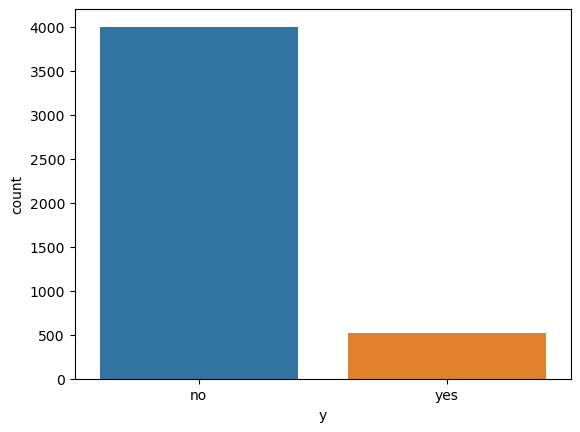

In [8]:
Y = dataframe['y']
sns.countplot(x=Y)
dataframe['y'].value_counts()

La variable de salida 'y' tiene dos los valores de "yes" y "no" , para un mejor manejo de los datos, estos se convertiran a un formato binario

```"no" = 0```  

```"yes = 1```

ademas se renombra la columna 'y' por 'Resultado'

In [27]:
dataframe['y'] = dataframe['y'].map({'yes' : 1, 'no' : 0})
dataframe.rename(columns={'y':'resultado'}, inplace=True)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


0    4000
1     521
Name: resultado, dtype: int64

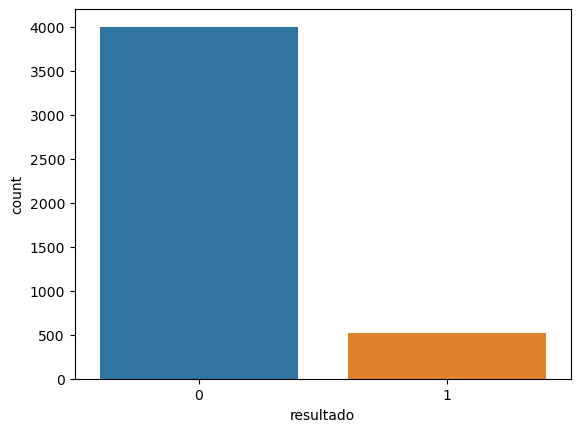

In [10]:
Y = dataframe['resultado']
sns.countplot(x=Y)
dataframe['resultado'].value_counts()

Otras variable con valores similares a "y" con valores de "yes" y "no" son:

* "default": que indica si hubo incumplimiento de pago
* "housing" : indica si tiene prestamo hipotecario (vivienda)
* "loan" : indica si tiene prestamo personal

Estas variables tambien se transformaran a formato binario

In [28]:
dataframe['default'] = dataframe['default'].map({'yes' : 1, 'no' : 0})
dataframe['housing'] = dataframe['housing'].map({'yes' : 1, 'no' : 0})
dataframe['loan'] = dataframe['loan'].map({'yes' : 1, 'no' : 0})
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


0    4445
1      76
Name: default, dtype: int64

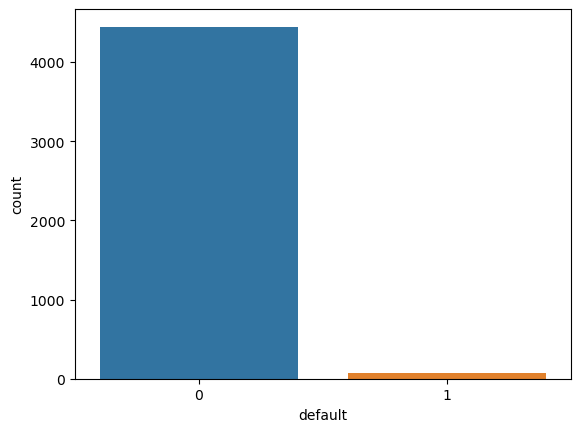

In [29]:
Y = dataframe['default']
sns.countplot(x=Y)
dataframe['default'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

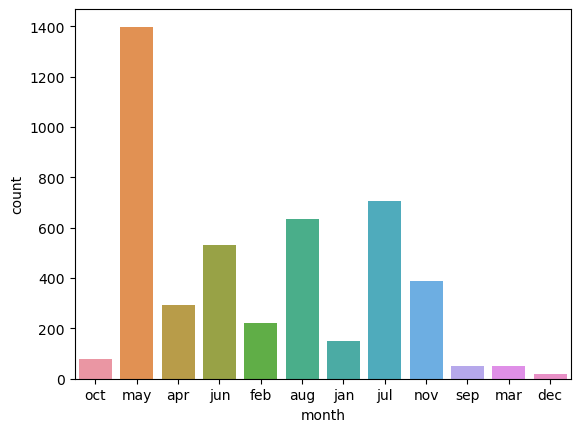

In [15]:
Y = dataframe['month']
sns.countplot(x=Y)
dataframe['month'].value_counts()

Variable: Trabajo

In [13]:
dataframe['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

### Ordenamiento del dataframe por una variable

Variable: saldo

In [30]:
dataframeTratamiento = dataframe.sort_values(by=['balance'])
# Mostrar los diez primeros datos
dataframeTratamiento.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
2398,51,entrepreneur,married,secondary,1,-2082,0,1,cellular,28,jul,123,6,-1,0,unknown,0
2538,44,management,married,secondary,0,-1746,1,0,unknown,20,jun,218,1,-1,0,unknown,0
856,49,technician,married,secondary,1,-1680,1,1,unknown,27,jun,92,4,-1,0,unknown,0
3584,46,blue-collar,married,secondary,0,-1400,1,0,telephone,6,may,309,3,355,4,failure,0
2072,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,104,10,-1,0,unknown,0
1972,42,technician,married,secondary,0,-1310,1,1,unknown,28,may,162,1,-1,0,unknown,0
2599,52,management,married,tertiary,0,-1224,1,0,cellular,7,may,253,4,-1,0,unknown,0
804,40,management,married,tertiary,0,-1212,1,0,cellular,15,may,1259,2,333,18,failure,0
189,56,retired,married,secondary,0,-1206,1,0,cellular,15,jun,382,2,-1,0,unknown,1


### Visualización 2D: varias variables para análisis
Variables: 
* Edad  (age), 
* Saldo (balance)

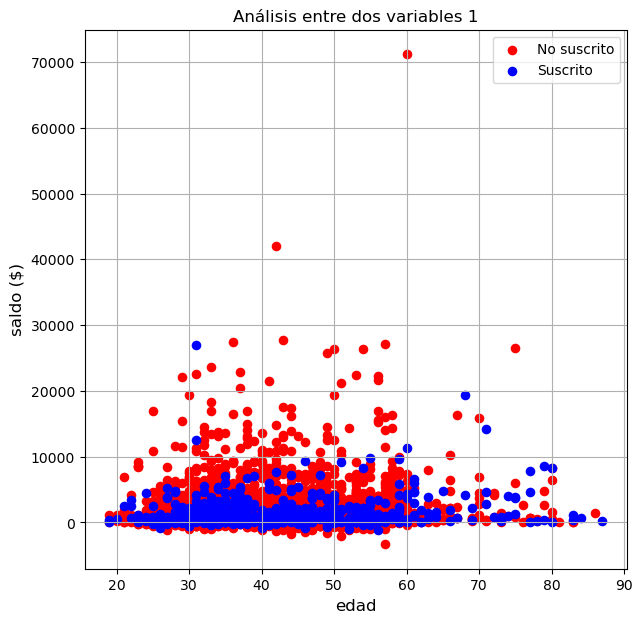

In [14]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('edad', fontsize =12)
ax.set_ylabel('saldo ($)', fontsize = 12)
ax.set_title('Análisis entre dos variables 1', fontsize = 12)
targets = [0, 1] 
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indexTokeep = dataframeTratamiento['resultado'] == target
    ax.scatter(dataframeTratamiento.loc[indexTokeep, 'age'],
               dataframeTratamiento.loc[indexTokeep, 'balance'],
               c = color,
               s = 35 # tamaño de los puntos
               )
ax.legend(['No suscrito','Suscrito'])
ax.grid()
plt.show()



Variables:

* Saldo  (balance)
* Duracion (duration)

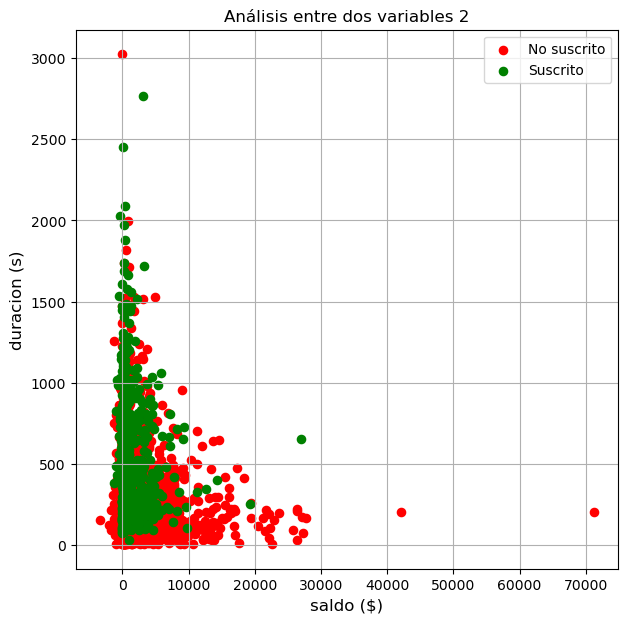

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('saldo ($)', fontsize =12)
ax.set_ylabel('duracion (s)', fontsize = 12)
ax.set_title('Análisis entre dos variables 2', fontsize = 12)
targets = [0, 1] 
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indexTokeep = dataframeTratamiento['resultado'] == target
    ax.scatter(dataframeTratamiento.loc[indexTokeep, 'balance'],
               dataframeTratamiento.loc[indexTokeep, 'duration'],
               c = color,
               s = 35 # tamaño de los puntos
               )
ax.legend(['No suscrito','Suscrito'])
ax.grid()
plt.show()

### Visualización 2D: una variable para análisis
Variable: Saldo (balance)

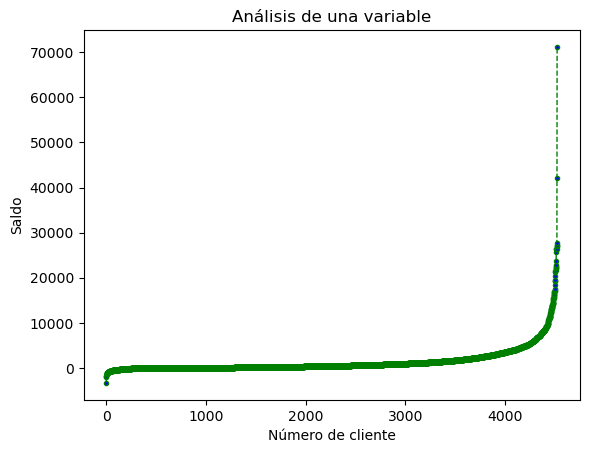

In [38]:
dataframeTratamientoOrdenado = dataframeTratamiento.sort_values(by=["balance"])
variable_analisis = dataframeTratamientoOrdenado.loc[:,['balance']]
cantidad_muestras = len(dataframeTratamientoOrdenado.index)
array_cantidad_muestras = range(cantidad_muestras)

plt.plot(array_cantidad_muestras, variable_analisis, color= 'green', linestyle="dashed", linewidth = 1, marker='o', markerfacecolor='blue', markersize = 3)
plt.title('Análisis de una variable')
plt.xlabel('Número de cliente')
plt.ylabel('Saldo')
plt.show()

## 3. Análisis de variables categóricas

In [21]:

def descripcion_cantidad_categorias(dataframe, categorical_features):
    cantidad_variables_categoricas = len(categorical_features)
    for var in categorical_features:
        cantidad_categorias = dataframe[var].nunique()
        print(f"Cantidad de categorías en la variable {var} : {cantidad_categorias}")
    return cantidad_variables_categoricas


Para buscar las variables categoricas, con la libreria pandas filtramos la columnas que son de tipo "object", no siempre las de este tipo son de tipo categoricas por ejemplo una fecha es una variable numerica

In [31]:

# Se obtiene las variables categoricas, todas las que son de tipo object
columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [32]:
#columnas_categoricas.pop()
cantidad_variables_categoricas = descripcion_cantidad_categorias(dataframe, columnas_categoricas)
print(f"Cantidad de variables categóricas : {cantidad_variables_categoricas}")


Cantidad de categorías en la variable job : 12
Cantidad de categorías en la variable marital : 3
Cantidad de categorías en la variable education : 4
Cantidad de categorías en la variable contact : 3
Cantidad de categorías en la variable month : 12
Cantidad de categorías en la variable poutcome : 4
Cantidad de variables categóricas : 6


Hay 6 variables categóricas 

*  Trabajo (job)
*  Educacion (education), 
*  Estado Civil (marital),
*  Contacto (contact), tipo de contacto
*  Mes (month) , ultimo mes en el que se contacto
*  Resultado previo (poutcome), como termino el ultimo contacto

En la variable "Trabajo"  se tiene las siguientes categorias:

In [35]:
dataframe['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

En la variable "Educacion"  se tiene las siguientes categorias:

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

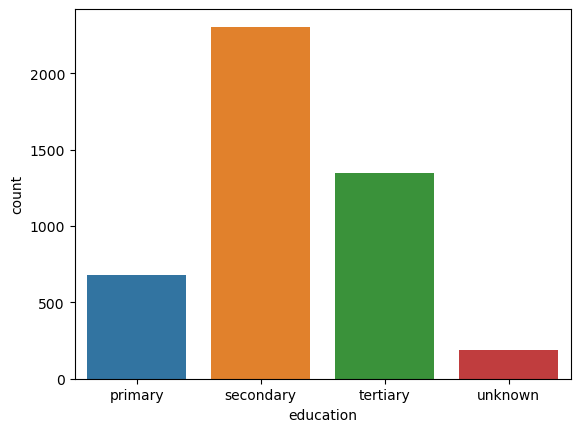

In [34]:
Y = dataframe['education']
sns.countplot(x=Y)
dataframe['education'].value_counts()

En la variable 'Estado civil' se tiene las siguentes categorias:

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

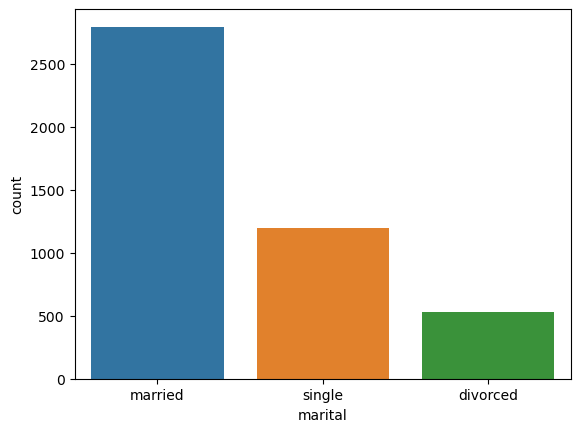

In [36]:
Y = dataframe['marital']
sns.countplot(x=Y)
dataframe['marital'].value_counts()

En la variable "Contacto" se tiene las siguentes categorias:

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

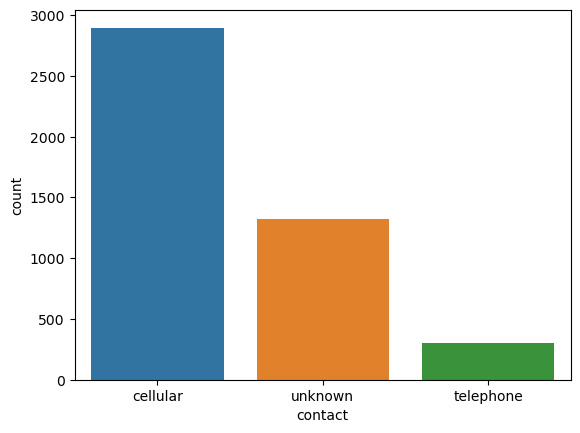

In [38]:
Y = dataframe['contact']
sns.countplot(x=Y)
dataframe['contact'].value_counts()

En la variable "Mes" se tiene las siguentes categorias:

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

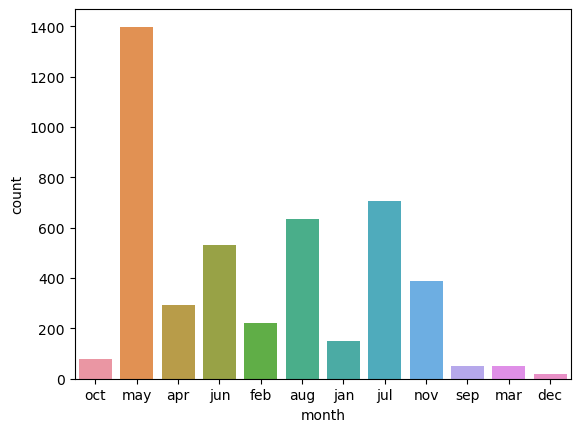

In [39]:
Y = dataframe['month']
sns.countplot(x=Y)
dataframe['month'].value_counts()

En la variable "Resultado previo" se tiene las siguentes categorias:

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

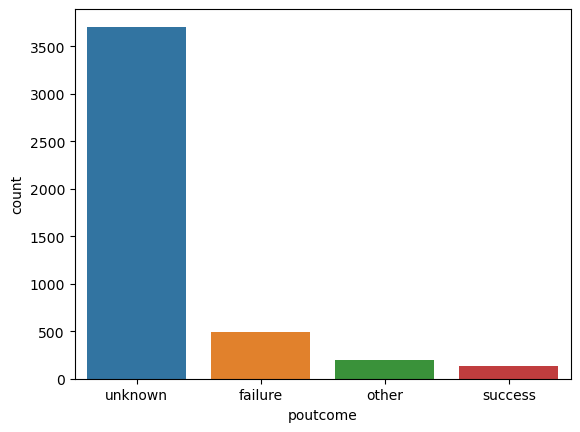

In [40]:
Y = dataframe['poutcome']
sns.countplot(x=Y)
dataframe['poutcome'].value_counts()

## 4. Análisis de correlación

### Análisis entre todas las variables

In [41]:
cr = dataframe.corr(numeric_only=True)
cr.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,resultado
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,-0.070517
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714


### Un mapa de calor simple

<Axes: title={'center': 'Mapa de calor 1'}>

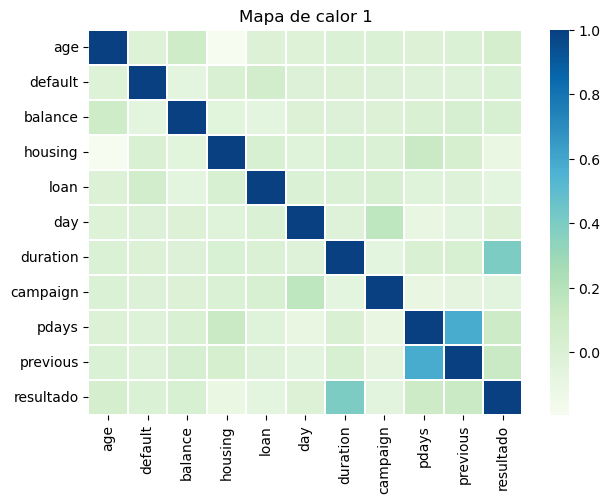

In [42]:
#Un mapa de calor personalizado: colores, tamaño
fig, ax  = plt.subplots(figsize = (7,5))
plt.title("Mapa de calor 1")
sns.heatmap(cr, cmap= "GnBu", linewidths = 0.30, annot=False)

### Mapa de calor personalizado
Solo se incluye la región inferior

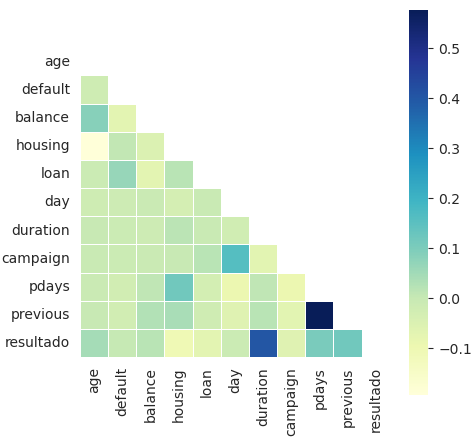

In [43]:
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cr, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.show()

### Análisis a partir de los valores: correlaciones positivas

Se hace una análisis de las correlaciones con respecto a la variable 'Resultado'

In [44]:
dfCorrOrdenado=cr.sort_values(by=['resultado'], ascending=False)
dfCorrOrdenado['resultado'].head(10)

resultado    1.000000
duration     0.401118
previous     0.116714
pdays        0.104087
age          0.045092
balance      0.017905
default      0.001303
day         -0.011244
campaign    -0.061147
loan        -0.070517
Name: resultado, dtype: float64

### Análisis a partir de los valores: correlaciones negativas

In [45]:
dfCorrOrdenado=cr.sort_values(by=['resultado'], ascending=True)
dfCorrOrdenado['resultado'].head(10)

housing    -0.104683
loan       -0.070517
campaign   -0.061147
day        -0.011244
default     0.001303
balance     0.017905
age         0.045092
pdays       0.104087
previous    0.116714
duration    0.401118
Name: resultado, dtype: float64

### Visualización para análisis entre dos variables
Se hace un análisis de correlacion entre las variables 'edad' y 'saldo'

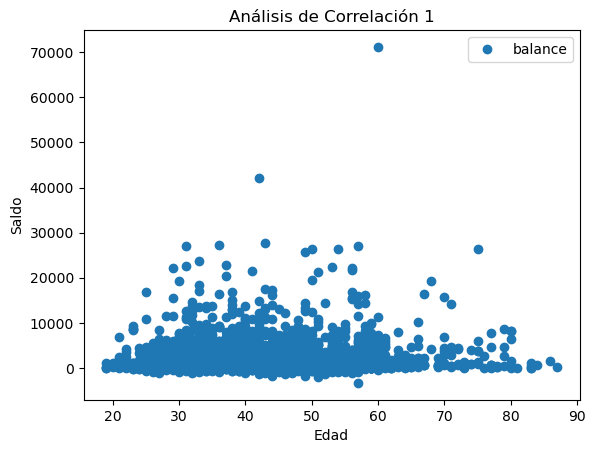

In [29]:
variable_1_analisis = "age"
variable_2_analisis = "balance"
dataframe.plot(x = variable_1_analisis, y = variable_2_analisis, style="o")
plt.title("Análisis de Correlación 1")
plt.xlabel("Edad")
plt.ylabel("Saldo")
plt.show()


Se hace un análisis de correlacion entre las variables 'duracion' y 'resultado'

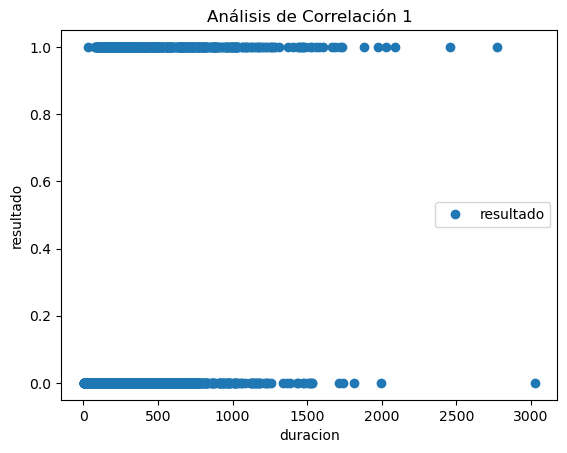

In [46]:
variable_1_analisis = "duration"
variable_2_analisis = "resultado"
dataframe.plot(x = variable_1_analisis, y = variable_2_analisis, style="o")
plt.title("Análisis de Correlación 1")
plt.xlabel("duracion")
plt.ylabel("resultado")
plt.show()

## 5. Manejo de datos faltantes y variables no relevantes

Se descartan algunas variables que se supone no aportan al análisis o tienen datos faltantes.

Todas las variables se consideran importantes para el análisis, incluso aunque no tengan correlacion con el resto de variables, por lo que no se eliminan variables



In [47]:

print(dataframe.shape)
dataframe.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,resultado
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


## 6. Selección y extracción de variables

Selección de variables según el análisis de correlación

A continuación se seleccionan las variables mas relevantes con respecto a la variable de salida "resultado"

In [48]:

variables_seleccionadas = ["age","default","balance", "duration", "pdays", "previous","resultado"]
dataframe_nuevo = dataframe[variables_seleccionadas]
print(dataframe_nuevo.shape)
dataframe_nuevo.head()


(4521, 7)


,age,default,balance,duration,pdays,previous,resultado
0,30,0,1787,79,-1,0,0
1,33,0,4789,220,339,4,0
2,35,0,1350,185,330,1,0
3,30,0,1476,199,-1,0,0
4,59,0,0,226,-1,0,0


## 7. Segmentación y filtros

Se ordena el nuevo dataframe por la variable Saldo (balance)

In [49]:
dataframe_tratamiento = dataframe_nuevo.sort_values(by=['balance'])
print(dataframe_tratamiento.shape)
dataframe_tratamiento.head()

(4521, 7)


,age,default,balance,duration,pdays,previous,resultado
4517,57,1,-3313,153,-1,0,0
2398,51,1,-2082,123,-1,0,0
2538,44,0,-1746,218,-1,0,0
856,49,1,-1680,92,-1,0,0
3584,46,0,-1400,309,355,4,0


### Filtración por variables: 'Edad' y 'Saldo'

para los valores maximos y minimos de las variables se toma como referencia el grafico de correlacion 1 (2 variables)

In [50]:

# limits de valores para 'Saldo'
balance_min = 0
balance_max = 15000
# limites de valores para 'edad'
age_min = 30
age_max = 50

dataframe_filtrado = dataframe_tratamiento.loc[(dataframe_tratamiento['age'] >= age_min) &  (dataframe_tratamiento['age'] <= age_max)]
dataframe_filtrado = dataframe_filtrado.loc[(dataframe_tratamiento['balance'] >= balance_min) &  (dataframe_tratamiento['balance'] <= balance_max)]
print(dataframe_filtrado.shape)
dataframe_filtrado.head(10)


(2827, 7)


,age,default,balance,duration,pdays,previous,resultado
1800,44,0,0,300,-1,0,0
2861,36,0,0,599,-1,0,0
4205,44,0,0,97,-1,0,0
2891,32,0,0,550,-1,0,1
2957,50,0,0,179,-1,0,0
1511,34,0,0,63,-1,0,0
3789,47,0,0,508,-1,0,1
4223,32,0,0,746,-1,0,0
950,44,0,0,56,-1,0,0
3752,47,0,0,250,-1,0,0


Se calcula la media de todas las variables para lo clientes con el mismo saldo y edad
se agrupa por estas dos ultimas variables (edad , saldo)

In [51]:
dataframe_segmento = dataframe_filtrado.groupby(['age','balance'])
dataframe_segmento = dataframe_segmento.mean()
dataframe_segmento.head(10)

default    duration       pdays  previous  resultado
age balance                                                      
30  0            0.0  328.777778   39.444444       1.0        0.0
    1            0.0   80.000000   -1.000000       0.0        0.0
    2            0.0  566.500000   42.000000       0.5        0.5
    3            0.0   45.000000  169.000000       2.0        0.0
    4            0.5  263.500000   -1.000000       0.0        0.0
    6            0.0  241.000000   -1.000000       0.0        0.0
    11           0.0  157.000000   -1.000000       0.0        0.0
    18           0.0  121.000000   -1.000000       0.0        0.0
    20           0.0  404.000000  340.000000       1.0        0.0
    25           0.0   44.000000   -1.000000       0.0        0.0

Se agrupa solo con una variable 'Edad' (age)

In [52]:
dataframe_segmento = dataframe_segmento.groupby('age')
dataframe_segmento.head(2)

default    duration       pdays  previous  resultado
age balance                                                       
30  0        0.000000  328.777778   39.444444  1.000000   0.000000
    1        0.000000   80.000000   -1.000000  0.000000   0.000000
31  0        0.000000  171.384615   16.230769  0.692308   0.000000
    2        0.000000  112.000000   -1.000000  0.000000   0.000000
32  0        0.000000  232.947368    9.526316  0.421053   0.105263
    1        0.000000  399.000000   -1.000000  0.000000   0.000000
33  0        0.000000  302.416667   -1.000000  0.000000   0.083333
    1        0.000000  257.000000   -1.000000  0.000000   0.000000
34  0        0.000000  186.300000   13.450000  0.150000   0.100000
    1        0.000000  391.000000   -1.000000  0.000000   0.000000
35  0        0.038462  279.807692   24.961538  0.730769   0.153846
    2        0.000000  446.000000   -1.000000  0.000000   0.000000
36  0        0.000000  275.615385   18.307692  0.076923   0.000000
    6        0.000000  129.000000  144.333333  0.333333   0.000000
37  0        0.117647  177.176471   44.588235  0.529412   0.117647
    1        0.000000  395.000000   -1.000000  0.000000   0.000000
38  0        0.000000  263.055556   50.333333  0.388889   0.055556
    1        0.000000  152.000000   -1.000000  0.000000   0.000000
39  0        0.000000  293.000000   73.833333  0.750000   0.000000
    2        0.000000  180.000000   -1.000000  0.000000   0.000000
40  0        0.076923  192.307692   50.230769  1.461538   0.153846
    2        0.000000  197.000000   -1.000000  0.000000   0.000000
41  0        0.000000  224.444444   40.000000  0.222222   0.000000
    4        0.000000   74.000000   -1.000000  0.000000   0.000000
42  0        0.000000  210.933333   -1.000000  0.000000   0.000000
    1        0.000000   59.000000   -1.000000  0.000000   0.000000
43  0        0.142857  236.857143   53.000000  1.428571   0.000000
    2        0.000000  627.500000   -1.000000  0.000000   0.000000
44  0        0.100000  164.700000   -1.000000  0.000000   0.000000
    10       0.000000  196.000000   -1.000000  0.000000   0.000000
45  0        0.000000  351.416667   22.750000  0.750000   0.166667
    16       0.000000   59.000000   -1.000000  0.000000   0.000000
46  0        0.000000  156.500000   63.166667  0.500000   0.000000
    4        0.000000  268.000000  261.000000  5.000000   1.000000
47  0        0.000000  481.833333   -1.000000  0.000000   0.166667
    2        0.333333  132.000000   -1.000000  0.000000   0.000000
48  0        0.000000  175.666667   84.666667  0.500000   0.000000
    5        0.000000  381.000000   -1.000000  0.000000   0.000000
49  0        0.000000  129.500000   -1.000000  0.000000   0.000000
    15       0.000000  550.000000   -1.000000  0.000000   0.000000
50  0        0.000000  141.666667   -1.000000  0.000000   0.000000
    4        0.000000  223.000000   96.000000  2.000000   0.000000

## 8. Análisis y eliminación de outliers

De ```dataframe_filtrado``` se normaliza los datos a valores entre 0 y 1

In [53]:
from sklearn import preprocessing
data_scaled_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaled_minmax.fit_transform(dataframe_filtrado)
dataframe_scaled_minmax = pd.DataFrame(data=data_scaled_minmax, columns=dataframe_filtrado.columns)
print(dataframe_scaled_minmax.shape)
dataframe_scaled_minmax.head(10)

(2827, 7)


,age,default,balance,duration,pdays,previous,resultado
0,0.70,0.0,0.0,0.106729,0.0,0.0,0.0
1,0.30,0.0,0.0,0.214906,0.0,0.0,0.0
2,0.70,0.0,0.0,0.033285,0.0,0.0,0.0
3,0.10,0.0,0.0,0.197178,0.0,0.0,1.0
4,1.00,0.0,0.0,0.062952,0.0,0.0,0.0
5,0.20,0.0,0.0,0.020984,0.0,0.0,0.0
6,0.85,0.0,0.0,0.181983,0.0,0.0,1.0
7,0.10,0.0,0.0,0.268090,0.0,0.0,0.0
8,0.70,0.0,0.0,0.018452,0.0,0.0,0.0
9,0.85,0.0,0.0,0.088640,0.0,0.0,0.0


### Visualización de outliers en figura 3D

Se utiliza las variables 'Year_Birth', 'Income' y 'MntWines'

In [55]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

columnas_seleccionadas =  dataframe_scaled_minmax[['age', 'balance' , 'duration']]

# se convierten las columnas seleccionadas a numpy.ndarray
data_array = columnas_seleccionadas.to_numpy()

# Se define un umbral de distancia euclidiana para identificar outliers
umbral = 1.2

# Calcula la distancia euclidiana desde el origen para cada uno de los puntos
distancias = np.linalg.norm(data_array, axis=1)

# indentificacion de los indices de los outliers
outliers_indices = np.where(distancias > umbral)[0]

# se separa los datos en dos grupos: puntos normales y outliers
puntos_normales  = data_array[distancias <= umbral]
outliers = data_array[outliers_indices]

# Se crea la figura 3d interactiva (esfera)
fig3d = go.Figure()

# plotea los puntos de datos normales dentro de la esfera

fig3d.add_trace(go.Scatter3d(
    x = puntos_normales[:,0],
    y = puntos_normales[:,1],
    z = puntos_normales[:,2],
    mode='markers',
    marker={'color':'blue', 'size': 4},
    name='Puntos Normales'

))

# plotea los outliers fuera de la esfera
fig3d.add_trace(go.Scatter3d(
    x=outliers[:, 0],
    y=outliers[:, 1],
    z=outliers[:, 2],
    mode='markers',
    marker={'color':'red', 'size':4},
    name='Outliers'
))

# Crea una esfera que excluye los outliers
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = umbral * np.outer(np.cos(u), np.sin(v))
y = umbral * np.outer(np.sin(u), np.sin(v))
z = umbral * np.outer(np.ones_like(u), np.cos(v))

fig3d.add_trace(go.Surface(x=x, y=y, z=z, colorscale='greens', opacity=0.3, showscale=False, name='Esfera Umbral'))

# Se configura el diseño de la figura
fig3d.update_layout(
    scene={
        'xaxis_title':'X: Edad', #EJE X
        'yaxis_title':'Y: Saldo', #EJE Y
        'zaxis_title':'Z: Duracion contacto' #EJE Z
    },
    scene_camera={
        'center':{'x':0, 'y':0, 'z':0},
        'eye':{'x':1.25, 'y':1.25, 'z':1.25}
    }
)

# Se muestra la figura interactiva
fig3d.show()

Se guarda el dataframe con los outliers filtrados

In [56]:
dataframe_scaled_minmax['DIST'] = np.sqrt(dataframe_scaled_minmax['age']**2 + dataframe_scaled_minmax['balance']**2 + dataframe_scaled_minmax['duration']**2)
# Se filtra el DataFrame para obtener solo las muestras dentro de la esfera
df_filtrado = dataframe_scaled_minmax[dataframe_scaled_minmax['DIST'] <= umbral]
df_filtrado = df_filtrado.drop(['DIST'], axis=1)
print(df_filtrado.shape)
df_filtrado.head(20)


(2822, 7)


,age,default,balance,duration,pdays,previous,resultado
0,0.70,0.0,0.0,0.106729,0.000000,0.00,0.0
1,0.30,0.0,0.0,0.214906,0.000000,0.00,0.0
2,0.70,0.0,0.0,0.033285,0.000000,0.00,0.0
3,0.10,0.0,0.0,0.197178,0.000000,0.00,1.0
4,1.00,0.0,0.0,0.062952,0.000000,0.00,0.0
5,0.20,0.0,0.0,0.020984,0.000000,0.00,0.0
6,0.85,0.0,0.0,0.181983,0.000000,0.00,1.0
7,0.10,0.0,0.0,0.268090,0.000000,0.00,0.0
8,0.70,0.0,0.0,0.018452,0.000000,0.00,0.0
9,0.85,0.0,0.0,0.088640,0.000000,0.00,0.0


## 9. Conlusiones

En esta guía se ha revisado métodos para visualizar estadísticas o gráficos, para así tener una idea inicial del dataset con el que se está trabajando. También se ha revisado métodos para descubrir valores atípicos conocidos también como “Outliers” y como extraerlos o filtrarlos para un análisis más preciso. Por supuesto, los métodos o estrategias mostradas en esta guía no siempre deben seguirse estrictamente ya que dependerá de los datos del “dataset” con el que se está trabajando. 

El análisis de los datos es importante para llegar a conclusiones y consecuentemente a una toma de decisiones. En este caso se ha trabajado con el “dataset” de una tienda (donde se asume que es una muestra) donde se a partir de un analisis de correlacion con respecto a la variable “Respuesta” que indica si tuvo efecto la última campaña publicitaria, (1=Si, 0 = No) se puede llegar a observar que las variables que más influyen son los “ingresos anuales” de los clientes y la “cantidad de gasto en vino”, y no la variable de “año de nacimiento” de la cual se puede concluir que se está tratando con clientes que en su mayoría son adultos mayores. 

Con estas conclusiones y también las observaciones de otras variables como “Numero de compras Web” se puede llegar a considerar mejorar el sitio web de compra, haciéndolo más intuitivo para los clientes que son adultos mayores. 

## Referencias

guia:

https://genscinet.com/analisis-exploratorio/

Dataset:

https://archive.ics.uci.edu/dataset/222/bank+marketing

